# SIMULATION AND MONTE CARLO INTEGRATION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import lognorm, poisson, norm
from rpy2.robjects import r
from rpy2.robjects.packages import importr
import rpy2
import rpy2.robjects as robjects
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri
from scipy import integrate
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
#from sympy import *
from tabulate import tabulate
from numpy import array, diag, dot, maximum, empty, repeat, ones, sum
from scipy.special import factorial
import seaborn as sns
from scipy.stats import gamma
from scipy import stats
from scipy.stats import norm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
sns.set()

# 1. Problem 6.7

In [2]:
# S = prices of stock over time
# S0 = price at time zero
# ST = price at time T
# K = strike price
# T = time of maturity
# r = risk-free rate of return
# n = number of iterations
# m = number of mc estimations
# sigma = stock's volatility
#########################################################################

## INITIAL VALUES
S0 = 50
K = 52
sigma = 0.5
T = 30
r = 0.05
n = 100000
m = 100

## BACKGROUND: MC ESTIMATES (EUROPEAN CALL OPTION)
mu_mc_e=[]
for j in range (m):
    ST=S0*np.exp((r-(sigma**2)/2)*T/365 + sigma*np.random.normal(0, 1, n)*np.sqrt(T/365))
    C=[]
    for i in range(n):
        C.append(np.exp(-r*T/365)*max(0,(ST[i] - K)))
    mu_mc_e.append(np.mean(C))
se_mc_e = np.std(mu_mc_e)/np.sqrt(m)

In [3]:
se_mc_e

0.0011438737388950763

# a.  Conﬁrm that the fair price for this option is 2.10 when the payoff is based on S(30) [i.e., a standard option with payoff as in (6.74)]. 

In [4]:
print('The fair price for European call option when the payoff is based on S(30) will be', np.mean(C))

The fair price for European call option when the payoff is based on S(30) will be 2.121015761646116


In [5]:
print('The standard deviation of fair price for European call option using simple Monte Carlo will be', np.std(C))

The standard deviation of fair price for European call option using simple Monte Carlo will be 3.9752012402301227


# b. Consider the analogous Asian option (same S(0), K, σ, N, and r) with payoff based on the arithmetic mean stock price during the holding period, as in (6.77). Using simple Monte Carlo, estimate the fair price for this option. 

In [97]:
## MC ESTIMATES (ASIAN ARITHMETIC AND GEOMETRIC CALL OPTION)
#T=50
T=30
n = 1200
m = 80
mu_mc = []
theta_mc=[]
for j in range (m):
    A=[]
    theta=[]
    for i in range (n):
        ST=np.zeros(T+1)
        ST[0]=S0
        for k in range(1,T+1):
            ST[k] = ST[k-1]*np.exp(((r-(sigma**2)/2)/365)+sigma*np.random.normal(0, 1, 1)/np.sqrt(365))
        A.append(np.exp(-r*T/365)*max(0,(np.mean(ST[1:T+1]) - K)))
        theta.append(np.exp(-r*T/365)*max(0,np.exp(np.mean(np.log(ST[1:T+1]))) - K))
    mu_mc.append(np.mean(A))
    theta_mc.append(np.mean(theta))

In [98]:
print('The fair price for Asian call option using simple Monte Carlo will be', np.mean(mu_mc))

The fair price for Asian call option using simple Monte Carlo will be 0.9420448714903301


In [99]:
print('The standard deviation of fair price for Asian call option using simple Monte Carlo will be', np.std(mu_mc))

The standard deviation of fair price for Asian call option using simple Monte Carlo will be 0.051901048151177014


# C. Improve upon the estimate in (b) using the control variate strategy described in Example 6.13. 

In [9]:
T=30
N = T
c3 = 1 + 1/N
c2 = sigma*((c3*T/1095)*(1 + 1/(2*N)))**0.5
c1 = (1/c2)*(np.log(S0/K) + (c3*T/730)*(r - (sigma**2)/2)+(c3*(sigma**2)*T/1095)*(1 + 1/(2*N)))
theta1 = S0*norm.cdf(c1)*np.exp(-T*(r + c3*(sigma**2)/6)*(1 - 1/N)/730)-K*norm.cdf(c1-c2)*np.exp(-r*T/365)

## CONTROL VARIATE
mu_cv=mu_mc-1*(theta_mc-theta1)

In [10]:
print('The fair price for Asian call option using the control variate strategy will be', np.mean(mu_cv))

The fair price for Asian call option using the control variate strategy will be 0.944867802084877


In [11]:
print('The standard deviation of fair price for Asian call option using the control variate strategy will be', np.std(mu_cv))

The standard deviation of fair price for Asian call option using the control variate strategy will be 0.0022797808922244865


# d. Try an antithetic approach to estimate the fair price for the option described in part (b).

In [59]:
## MC ESTIMATES (ASIAN ARITHMETIC AND GEOMETRIC CALL OPTION)
T=30
# S0=100
# sigma=0.2
# r=0.05
# K=90
S0 = 50;
K = 52;
sigma = 0.5;
r = 0.05;
n = 1000000;
m = 100;
# n = 10000
# m = 10
mu_AS = []
theta_mc=[]
h_pos=[]
h_neg=[]
#z=np.random.normal(0, 1,1000)
for j in range (m):
    A=[]
    A1=[]
    theta=[]
    for i in range (500):
        ST=np.zeros(T+1)
        ST_=np.zeros(T+1)
        ST[0]=S0
        ST_[0]=S0
        for k in range(1,T+1):
            z=np.random.normal(0,1,1)
            ST[k] = ST[k-1]*np.exp(((r-(sigma**2)/2)/365)+sigma*z/np.sqrt(365))
            ST_[k] = (ST_[k-1]*np.exp(((r-(sigma**2)/2)/365)-sigma*z/np.sqrt(365)))
        A.append(0.5*np.exp(-r*T/365)*(max(0,(np.mean(ST[1:T+1]) - K))+max(0,(np.mean(ST_[1:T+1]) - K))))
#         A.append(np.exp(-r*T/365)*max(0,(np.mean(ST) - K)))
#         A1.append(np.exp(-r*T/365)*max(0,(np.mean(ST_) - K)))
        #theta.append(np.exp(-r*T/365)*max(0,np.exp(np.mean(np.log(ST))) - K))
    #h_pos.append(np.mean(A))
    #h_neg.append(np.mean(A1))
    #mu_AS.append((np.mean(A1)+np.mean(A))/2)
    mu_AS.append(np.mean(A))
    #theta_mc.append(np.mean(theta))

In [60]:
print('The fair price for Asian call option using the antithetic approach will be', np.mean(mu_AS))

The fair price for Asian call option using the antithetic approach will be 0.9402780607736819


In [61]:
print('The standard deviation of fair price for Asian call option using the antithetic approach will be', np.std(mu_AS))

The standard deviation of fair price for Asian call option using the antithetic approach will be 0.05221011504631053


# e. Using simulation and/or analysis, compare the sampling distributions of the estimators in (b), (c), and (d). 

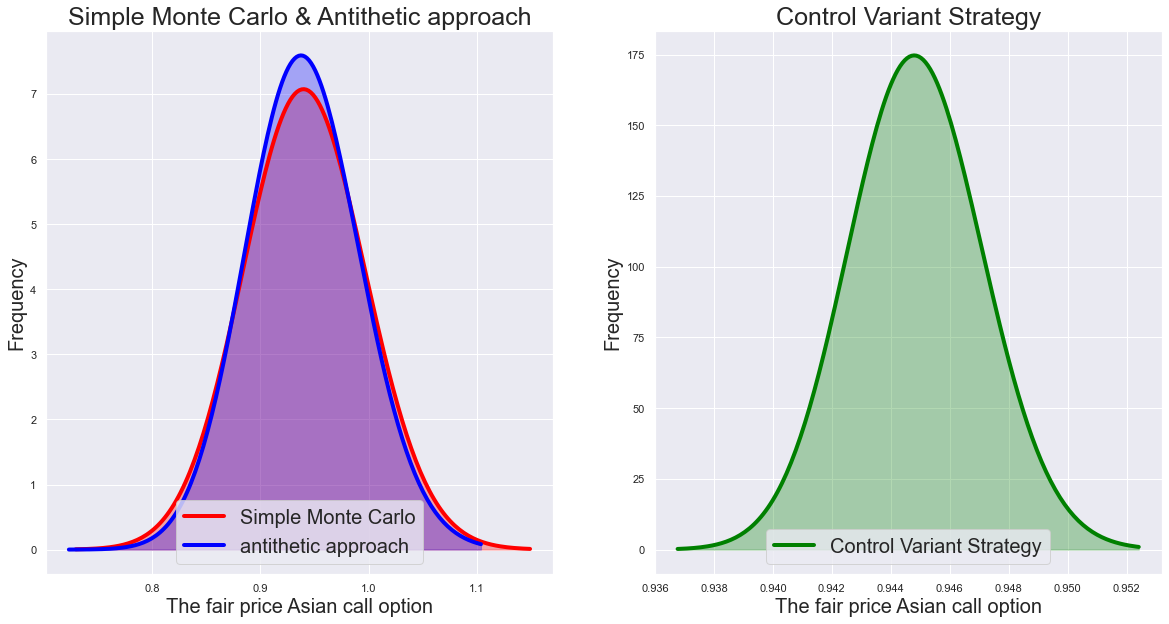

In [81]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
ax = sns.distplot(mu_mc, fit_kws={"color":"red",'linewidth': 4}, kde=False,
        fit=stats.gamma, hist=None, label="Simple Monte Carlo");
ax = sns.distplot(mu_AS, fit_kws={"color":"blue",'linewidth': 4}, kde=False,
        fit=stats.gamma, hist=None, label="antithetic approach");

# Get the two lines from the axes to generate shading
l1 = ax.lines[0]
l2 = ax.lines[1]

# Get the xy data from the lines so that we can shade
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax.fill_between(x1,y1, color="red", alpha=0.3)
ax.fill_between(x2,y2, color="blue", alpha=0.3)
plt.xlabel('The fair price Asian call option',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.title('Simple Monte Carlo & Antithetic approach',fontsize=25)
plt.legend(prop={"size":20})
plt.subplot(1, 2, 2)
ax = sns.distplot(mu_cv, fit_kws={"color":"green",'linewidth': 4}, kde=False,
        fit=stats.gamma, hist=None, label="Control Variant Strategy");
l3 = ax.lines[0]
x3 = l3.get_xydata()[:,0]
y3 = l3.get_xydata()[:,1]
ax.fill_between(x3,y3, color="green", alpha=0.3)

plt.xlabel('The fair price Asian call option',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.legend(prop={"size":20})
plt.title('Control Variant Strategy',fontsize=25)
plt.show(block=False)

# 2.  Problem 6.8 

In [16]:
z=np.random.normal(0,1,n)

In [17]:
def h(x): return np.exp(9+3*np.log(x)+z) 

In [18]:
n = 100000
# n = 1000
replication = 1000
muhats_MC=np.zeros((1000,1))
mu_RB=np.zeros((1000,1))
for i in range (replication):
    Xs=np.random.lognormal(0,1,n)
    muhats_MC[i]=np.mean(h(Xs)/Xs)
    mu_RB[i]=np.mean(np.exp(9)*(Xs**2)*np.sqrt(np.exp(1)))

In [19]:
print('The mean by using the simple Monte Carlo will be', np.mean(muhats_MC))

The mean by using the simple Monte Carlo will be 99092.51753012706


In [20]:
print('The standard deviation by using the simple Monte Carlo will be', np.std(muhats_MC))

The standard deviation by using the simple Monte Carlo will be 3344.5121937678746


In [21]:
print('The mean by using the  Rao–Blackwellized estimator will be', np.mean(mu_RB))

The mean by using the  Rao–Blackwellized estimator will be 98795.79462743473


In [22]:
print('The standard deviation by using the  Rao–Blackwellized estimator will be', np.std(mu_RB))

The standard deviation by using the  Rao–Blackwellized estimator will be 2249.1250068808567


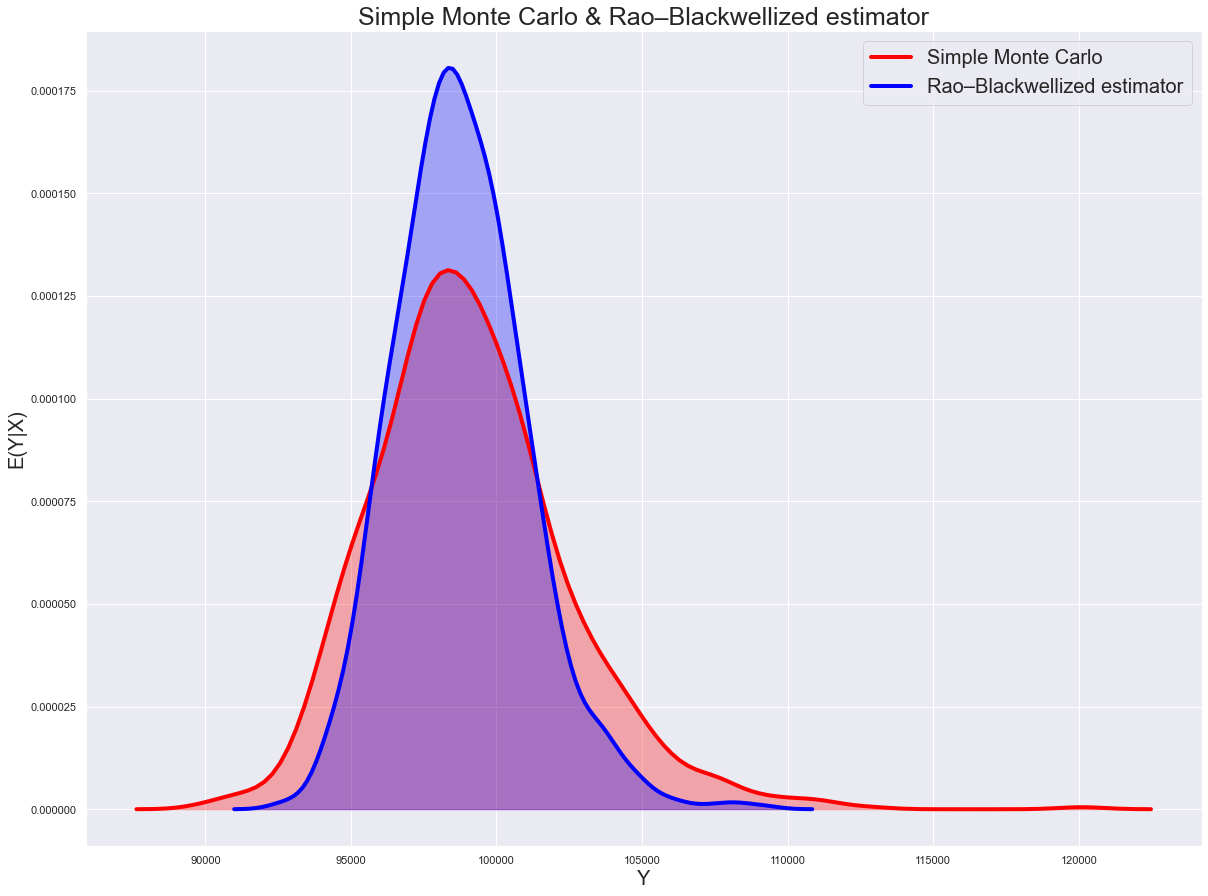

In [23]:
plt.figure(figsize=(20,15))
ax=sns.distplot(muhats_MC, hist=False, kde=True, 
             hist_kws=None,
             kde_kws={"label": "Simple Monte Carlo",'linewidth': 4,'color':'red'})
ax=sns.distplot(mu_RB, hist=False, kde=True, 
             hist_kws=None,
             kde_kws={"label": "Rao–Blackwellized estimator",'linewidth': 4,'color':'blue'})
l1 = ax.lines[0]
l2 = ax.lines[1]

# Get the xy data from the lines so that we can shade
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax.fill_between(x1,y1, color="red", alpha=0.3)
ax.fill_between(x2,y2, color="blue", alpha=0.3)
plt.xlabel('Y',fontsize=20)
plt.ylabel('E(Y|X)',fontsize=20)
plt.legend(prop={"size":20})
plt.title('Simple Monte Carlo & Rao–Blackwellized estimator',fontsize=25)
plt.show(block=False)